# Introduction and fundamental subspaces

## Question 1 (a)

In [7]:
#get I1-II6
def solve_I(b1,b2,b3,b4,b5,b6):
    import numpy as np
    A = np.array ([[0,6,-2,0,0,0],[0,4,1,2,2,0],[0,0,0,0,2,4],[1,-1,0,1,0,0],[0,0,1,0,-1,1],[0,0,0,1,-1,1]]) 
    b = np.array([b1,b2,b3,b4,b5,b6]) 
    x = np.linalg.solve(A,b) 
    return x

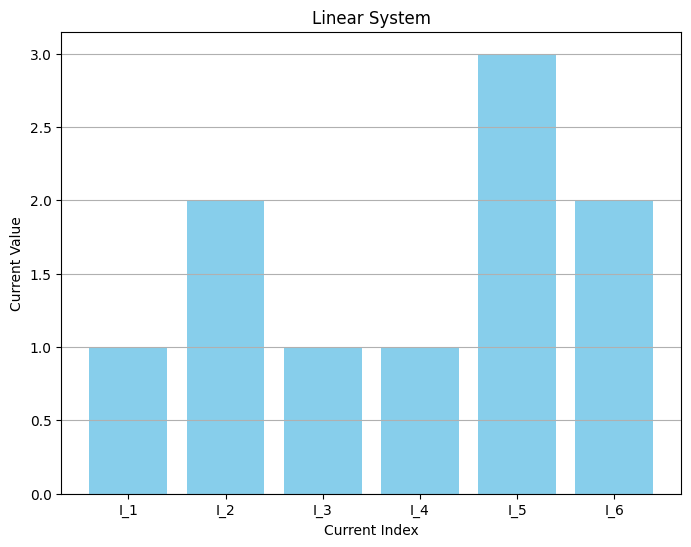

In [8]:
I = solve_I(10,17,14,0,0,0) # we can change the solve_I's parameters to get different currents
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(range(1, 7), I, color='skyblue')
plt.xlabel('Current Index')
plt.ylabel('Current Value')
plt.title('Linear System')
plt.xticks(range(1, 7), [f'I_{i}' for i in range(1, 7)])
plt.grid(axis='y')
plt.show()

## Question 1 (b)

### What is the rank of the matrix?
- The rank of a matrix is the number of independent columns.
- The dimension of the column space, $dim(C(A))$

In [9]:
import numpy as np
A = np.array ([[0,6,-2,0,0,0],[0,4,1,2,2,0],[0,0,0,0,2,4],[1,-1,0,1,0,0],[0,0,1,0,-1,1],[0,0,0,1,-1,1]]) 
rank_A = np.linalg.matrix_rank(A)
#print(A)
print(rank_A)

6


## What is the dimensiion of the four fundamental subspaces $C(A), N(A),C(A^T), N(A^T)$ in this case?

- $\textbf{C}(A)$ = 6
- $\textbf{N}(A)$ = 0
- $\textbf{C}(A^T)$ = 6
- $\textbf{N}(A^T)$ = 0

## Which subspace does the solution vector belong to?

- Column Space, $C(A)$

## Is the solution to the equation system unique given a certain right-hand-side? Motivate you answer.

- Yes. For any right-hand-side vector $\textbf{b}$, as long as $\textbf{b} \in \mathcal{R}^n$ , in this case $\textbf{b} \in \mathcal{R}^6$,there is a always unique solution.

## Which subspace does the right-hand-side vector belong to?

- Since the matrix $A$ is full rank, there will always be a solution for any $\textbf{b}$.

## Is it possible to find a right-hand-side where no solution exists? If so, examplify and figure out which subspace that right-hand-side vector belong to?

- Since matrix $A$ is full rank, there is no situation where there would be no solution. Any $\textbf{b} \in \textbf{C}(A)$.

# Question 2 (a)

In [11]:
import numpy as np
import time

def matrix_fac_v1(A,B):
    m, p1 = A.shape
    p2, n = B.shape
    if p1 != p2 :
        print("Can not Mutiply!")
        return 
    C = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            for k in range(p1):
                C[i,j] += A[i,k] * B[k,j]
    return C

def matrix_fac_v2(A,B):
    m, p1 = A.shape
    p2, n = B.shape
    if p1 != p2:
        print("Can not Mutiply!")
        return 
    C = np.zeros((m,n))
    for k in range(p1):
        for j in range(n):
            for i in range(m):
                C[i,j] += A[i,k] * B[k,j]
    return C


A = np.random.rand(500,500)
B = np.random.rand(500,500)

start_time_v1 = time.process_time()
matrix_fac_v1(A,B)
end_time_v1 = time.process_time()
time_v1 = end_time_v1 - start_time_v1
print("Vesion 1:",time_v1)

start_time_v2 = time.process_time()
matrix_fac_v2(A,B)
end_time_v2 = time.process_time()
time_v2 = end_time_v2 - start_time_v2
print("Version:",time_v2)

Vesion 1: 32.846137
Version: 33.758441000000005


## The leftmost algorithm is based on repeated dot-products, but what basic operation is the 2nd (rightmost) algorithm based on?

The right algorithm is based on repeated additions to the elements of the result Matrix $A$. Each element $C(i,j)$ is accumulated by traversing over a row of $A$ and a column of $B$, multiplying the corresponding elements and adding them up. This approach is sometimes referred to as the [outer product method]https://en.wikipedia.org/wiki/Outer_product#:~:text=In%20linear%20algebra%2C%20the%20outer,an%20n%20%C3%97%20m%20matrix, where the outer productions of rows of $A$ and columns of $B$ are computed one element at a time and added to the accumulating matrix $C$.